Epoch [100/1000], Loss: 135.3719
Epoch [200/1000], Loss: 33.8946
Epoch [300/1000], Loss: 13.4510
Epoch [400/1000], Loss: 8.5810
Epoch [500/1000], Loss: 7.9339
Epoch [600/1000], Loss: 7.4741
Epoch [700/1000], Loss: 6.9547
Epoch [800/1000], Loss: 6.8136
Epoch [900/1000], Loss: 6.7679
Epoch [1000/1000], Loss: 6.7151


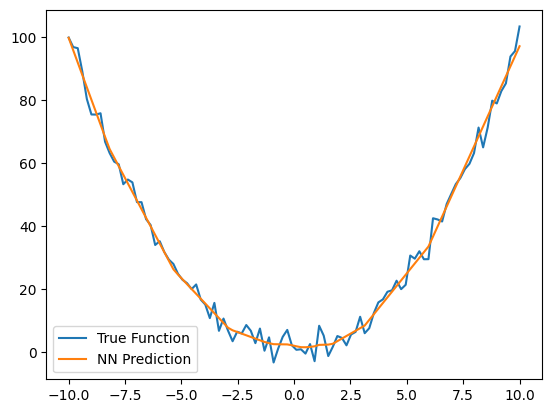

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# 生成训练数据
def generate_data():
    # 生成输入数据
    x = torch.linspace(-10, 10, 100).view(-1, 1)
    
    # 生成原始的 y 数据（无噪声）
    y = x ** 2
    
    # 添加噪声，噪声服从正态分布，标准差可以根据需要调整
    noise = torch.randn(y.size()) * 3  # 这里乘以 2 来控制噪声的幅度
    y_noisy = y + noise  # 将噪声加到 y 数据上
    
    return x, y_noisy

# 定义一个简单的全连接神经网络
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(1, 16)
        self.fc2 = nn.Linear(16, 16)
        self.fc3 = nn.Linear(16, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# 训练网络
def train_model(model, x_train, y_train, epochs=2000, lr=0.01):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    for epoch in range(epochs):
        # 前向传播
        y_pred = model(x_train)
        loss = criterion(y_pred, y_train)

        # 反向传播
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # 打印损失
        if (epoch + 1) % 100 == 0:
            print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

# 主函数
if __name__ == "__main__":
    # 生成数据
    x_train, y_train = generate_data()

    # 初始化模型
    model = SimpleNN()

    # 训练模型
    train_model(model, x_train, y_train, epochs=1000, lr=0.01)

    # 测试模型
    model.eval()
    with torch.no_grad():
        y_pred = model(x_train)

    # 可视化结果
    plt.plot(x_train.numpy(), y_train.numpy(), label='True Function')
    plt.plot(x_train.numpy(), y_pred.numpy(), label='NN Prediction')
    plt.legend()
    plt.show()